In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import metrics

import random
from sklearn import preprocessing
import statsmodels.api as sm

from sklearn.preprocessing import PolynomialFeatures



In [2]:
Churn_df = pd.read_csv('Churn_Modelling.csv')
Churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#Check For missing values
Churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [18]:
#Convert to Categorical (Factors)
Churn_df['NumOfProducts'] = pd.Categorical(Churn_df.NumOfProducts)
Churn_df['HasCrCard'] = pd.Categorical(Churn_df.HasCrCard)
Churn_df['IsActiveMember'] = pd.Categorical(Churn_df.IsActiveMember)
Churn_df['Tenure'] = pd.Categorical(Churn_df.Tenure)
Churn_df['Gender'] = pd.Categorical(Churn_df.Gender)
Churn_df['Exited'] = pd.Categorical(Churn_df.Exited)

In [19]:
#Summary
Churn_df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.0,10000.000000,10000.0,10000.0,10000.0,10000.000000,10000.0
unique,NaN,NaN,2932,NaN,3,2,NaN,11.0,NaN,4.0,2.0,2.0,NaN,2.0
top,NaN,NaN,Smith,NaN,France,Male,NaN,2.0,NaN,1.0,1.0,1.0,NaN,0.0
freq,NaN,NaN,32,NaN,5014,5457,NaN,1048.0,NaN,5084.0,7055.0,5151.0,NaN,7963.0
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,NaN,76485.889288,NaN,NaN,NaN,100090.239881,NaN
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,NaN,62397.405202,NaN,NaN,NaN,57510.492818,NaN
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,NaN,0.000000,NaN,NaN,NaN,11.580000,NaN
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,NaN,0.000000,NaN,NaN,NaN,51002.110000,NaN
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,NaN,97198.540000,NaN,NaN,NaN,100193.915000,NaN
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,NaN,127644.240000,NaN,NaN,NaN,149388.247500,NaN


In [20]:
print(Churn_df['NumOfProducts'].value_counts())
print(Churn_df['HasCrCard'].value_counts())
print(Churn_df['IsActiveMember'].value_counts())
print(Churn_df['Exited'].value_counts())
print(Churn_df['Tenure'].value_counts())
print(Churn_df['Geography'].value_counts())
print(Churn_df['Gender'].value_counts())

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
1    7055
0    2945
Name: HasCrCard, dtype: int64
1    5151
0    4849
Name: IsActiveMember, dtype: int64
0    7963
1    2037
Name: Exited, dtype: int64
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64


<AxesSubplot:xlabel='EstimatedSalary'>

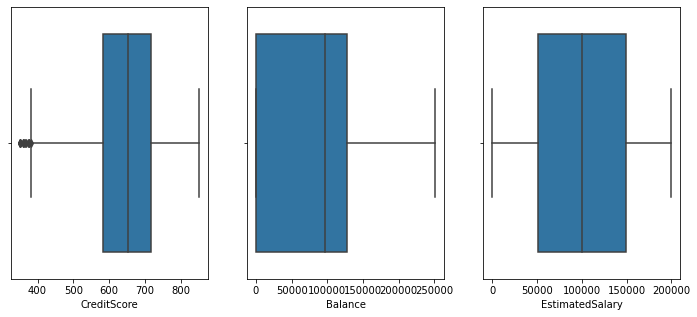

In [21]:
fig, axs = plt.subplots(ncols=3,figsize=(12,5))
sns.boxplot(x=Churn_df["CreditScore"],ax=axs[0])
sns.boxplot(x=Churn_df["Balance"],ax=axs[1])
sns.boxplot(x=Churn_df["EstimatedSalary"],ax=axs[2])

<AxesSubplot:xlabel='Age', ylabel='Count'>

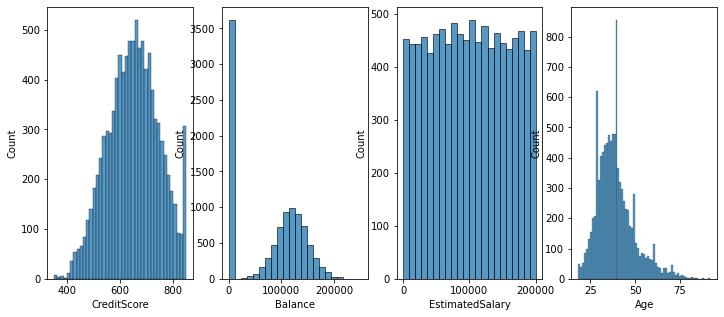

In [22]:
fig, axs = plt.subplots(ncols=4,figsize=(12,5))
sns.histplot(x=Churn_df["CreditScore"],ax=axs[0])
sns.histplot(x=Churn_df["Balance"],ax=axs[1])
sns.histplot(x=Churn_df["EstimatedSalary"],ax=axs[2])
sns.histplot(x=Churn_df["Age"],ax=axs[3])

In [ ]:
g= sns.catplot(x = "Geography", y = "Exited", data = Churn_df, kind = "bar", height = 5)
g.set_ylabels("Churn Probability")
plt.show()

In [5]:
print(Churn_df['Age'].value_counts())
# Age Binning
cut_labels_4 = ['1', '2', '3', '4','5','6']
cut_bins = [17, 30, 40, 50, 60,70,95]
Churn_df['Age_Bin'] = pd.cut(Churn_df['Age'], bins=cut_bins, labels=cut_labels_4)
print(Churn_df['Age_Bin'].value_counts())

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64
2    4451
3    2320
1    1968
4     797
5     331
6     133
Name: Age_Bin, dtype: int64


In [25]:
#Churn_df.to_csv("Output.csv")

In [40]:
#Chi-Square test
def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))

In [41]:
# CramerV test -- Correlation Measure - How string the correlation is 
# CramerV Range 0 (No Correlation) - 1 (Stringly Correlated)
def cramerV(df,c1,c2):
    groupsizes = pd.crosstab(index=Churn_df[c1], columns=Churn_df[c2])
    groupsizes = groupsizes.values
    chi2 = stats.chi2_contingency(groupsizes, correction=False)[0]
    sample_size = np.sum(groupsizes)
    min_dim = min(groupsizes.shape) - 1
    cramer_v = np.sqrt((chi2 / sample_size) / min_dim)
    return(cramer_v)

In [42]:
# Chi-Square test Relation between Categorical variables
print(chisq_of_df_cols(Churn_df, 'Gender', 'Exited')[1] < 0.05)
print(cramerV(Churn_df, 'Gender', 'Exited'))
print(chisq_of_df_cols(Churn_df, 'Geography', 'Exited')[1] < 0.05)
print(cramerV(Churn_df, 'Geography', 'Exited'))

print(chisq_of_df_cols(Churn_df, 'IsActiveMember', 'Exited')[1] < 0.05)
print(cramerV(Churn_df, 'IsActiveMember', 'Exited'))

print(chisq_of_df_cols(Churn_df, 'NumOfProducts', 'Exited')[1] < 0.05)
print(cramerV(Churn_df, 'NumOfProducts', 'Exited'))

print(chisq_of_df_cols(Churn_df, 'Age_Bin', 'Exited')[1] < 0.05)
print(cramerV(Churn_df, 'Age_Bin', 'Exited'))

print(chisq_of_df_cols(Churn_df, 'Tenure', 'Exited')[1] < 0.05)
print(cramerV(Churn_df, 'Tenure', 'Exited'))

print(chisq_of_df_cols(Churn_df, 'HasCrCard', 'Exited')[1] < 0.05)
print(cramerV(Churn_df, 'HasCrCard', 'Exited'))

#Churn_df.corr(method='pearson')

True
0.10651248767347464
True
0.17356708697916934
True
0.15612827818890512
True
0.38776660009689345
True
0.3634613673377061
False
0.037283203457308074
False
0.007137765603039053


In [6]:
#Transform Categoricsl variables to dummy variables
Churn_df = pd.get_dummies(Churn_df, 
                                    prefix=['Geo','Gen','Age'], 
                                    prefix_sep='_',
                                    dummy_na=False, 
                                    columns=['Geography','Gender','Age_Bin'],
                                    sparse=False,
                                    drop_first=False,
                                    dtype=int)
Churn_df

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,Geo_Germany,Geo_Spain,Gen_Female,Gen_Male,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,...,0,0,1,0,0,0,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,...,0,1,1,0,0,0,1,0,0,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,...,0,0,1,0,0,0,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,...,0,0,1,0,0,1,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,...,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,...,0,0,0,1,0,1,0,0,0,0
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,...,0,0,0,1,0,1,0,0,0,0
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,...,0,0,1,0,0,1,0,0,0,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,...,1,0,0,1,0,0,1,0,0,0


In [7]:
random.seed(100)
cols_to_norm = ['CreditScore', 'Balance', 'EstimatedSalary']
Churn_df[cols_to_norm] = Churn_df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
#Churn_df

feature_cols = [ 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember','CreditScore', 'Balance', 'EstimatedSalary',
               'Geo_France','Geo_Germany','Geo_Spain','Gen_Female','Gen_Male','Age_1','Age_2','Age_3','Age_4','Age_5','Age_6']

X = Churn_df[feature_cols]
y = Churn_df['Exited']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)
X_train

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,CreditScore,Balance,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain,Gen_Female,Gen_Male,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6
1554,4,2,1,1,0.556,0.632693,0.630965,1,0,0,0,1,0,1,0,0,0,0
2087,7,2,1,0,0.732,0.262942,0.072989,1,0,0,1,0,0,0,0,1,0,0
5470,1,2,1,1,0.534,0.408875,0.576934,1,0,0,0,1,1,0,0,0,0,0
2363,9,2,0,1,0.442,0.000000,0.387577,1,0,0,1,0,0,1,0,0,0,0
7570,7,3,1,0,0.694,0.699347,0.582210,1,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,4,2,1,1,0.488,0.478581,0.814829,0,1,0,1,0,0,1,0,0,0,0
4859,4,1,1,1,0.888,0.456122,0.538759,0,0,1,1,0,1,0,0,0,0,0
3264,5,2,1,0,0.776,0.642787,0.907178,1,0,0,0,1,0,1,0,0,0,0
9845,9,2,1,1,0.480,0.000000,0.743764,0,0,1,1,0,0,1,0,0,0,0


In [24]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
logreg_CWeights = LogisticRegression(class_weight="balanced")

# fit the model with data
logreg.fit(X_train,y_train)
logreg_CWeights.fit(X_train,y_train)

y_pred=logreg.predict(X_test)
y_pred_Weights=logreg_CWeights.predict(X_test)

In [25]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
#print ("clasification report", metrics.classification_report(y_test, y_pred))

Accuracy: 0.832
Precision: 0.69
Recall: 0.33495145631067963
F1 Score: 0.45098039215686275


In [26]:
cnf_matrix_CW= metrics.confusion_matrix(y_test, y_pred_Weights)
cnf_matrix_CW
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_Weights))
print("Precision:",metrics.precision_score(y_test, y_pred_Weights))
print("Recall:",metrics.recall_score(y_test, y_pred_Weights))
print("F1 Score:",metrics.f1_score(y_test, y_pred_Weights))
#print ("clasification report", metrics.classification_report(y_test, y_pred))

Accuracy: 0.727
Precision: 0.412532637075718
Recall: 0.7669902912621359
F1 Score: 0.536502546689304


Text(0.5, 257.44, 'Predicted label')

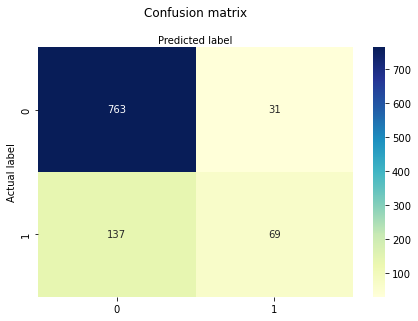

In [27]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

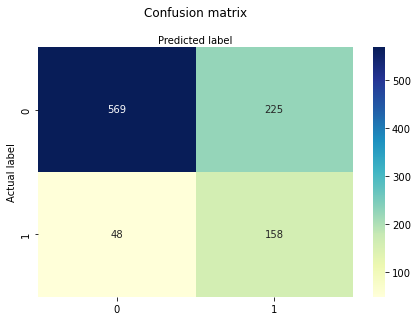

In [28]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_CW), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [12]:
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.411466
         Iterations 18


In [13]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 9000
Model:                          Logit   Df Residuals:                     8984
Method:                           MLE   Df Model:                           15
Date:                Mon, 10 Jan 2022   Pseudo R-squ.:                  0.1854
Time:                        18:06:21   Log-Likelihood:                -3703.2
converged:                       True   LL-Null:                       -4546.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Tenure             -0.0169      0.010     -1.673      0.094      -0.037       0.003
NumOfProducts      -0.1170      0.051     -2.306      0.021      -0.217      -0.018
HasCrCard          -0.0440      

In [14]:
yhat = log_reg.predict(X_test)
prediction = list(map(round, yhat))


from sklearn.metrics import (confusion_matrix,
                           accuracy_score)

cm = confusion_matrix(y_test, prediction)
print ("Confusion Matrix : \n", cm)
 
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))

Confusion Matrix : 
 [[763  31]
 [137  69]]
Test accuracy =  0.832


In [16]:
#Random Forest grid search
clf=RandomForestClassifier(random_state=42) 

param_grid = { 
    'n_estimators': [50, 100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]})

In [17]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

In [36]:
rfc_W=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 100, max_depth=8, 
                           criterion='entropy',class_weight="balanced") 
rfc_W.fit(X_train,y_train) 
y_pred=rfc.predict(X_test)
rfc_W_matrix = metrics.confusion_matrix(y_test, y_pred)
print(rfc_W_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

[[654 140]
 [ 50 156]]
Accuracy: 0.81
Precision: 0.527027027027027
Recall: 0.7572815533980582
F1 Score: 0.6215139442231076


In [31]:
rfc=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 100, max_depth=8, 
                           criterion='entropy') 
rfc.fit(X_train,y_train) 
y_pred=rfc.predict(X_test)
rfc_matrix = metrics.confusion_matrix(y_test, y_pred)
print(rfc_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

[[777  17]
 [130  76]]
Accuracy: 0.853
Precision: 0.8172043010752689
Recall: 0.36893203883495146
F1 Score: 0.508361204013378


In [17]:
#Feature Importance
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
importances = rfc.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

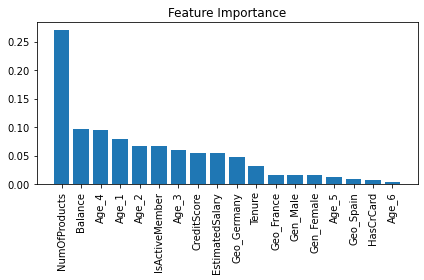

In [18]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

Text(0.5, 257.44, 'Predicted label')

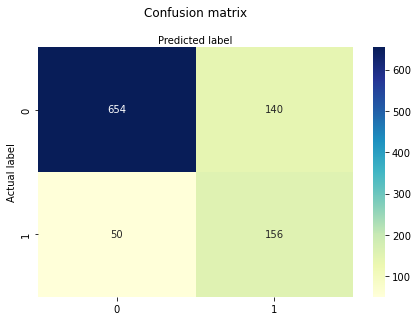

In [65]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(rfc_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')